In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the Train data set
dftrain = pd.read_csv("data_train.csv")

In [3]:
#Reading the Test data set
dftest = pd.read_csv("data_test.csv")

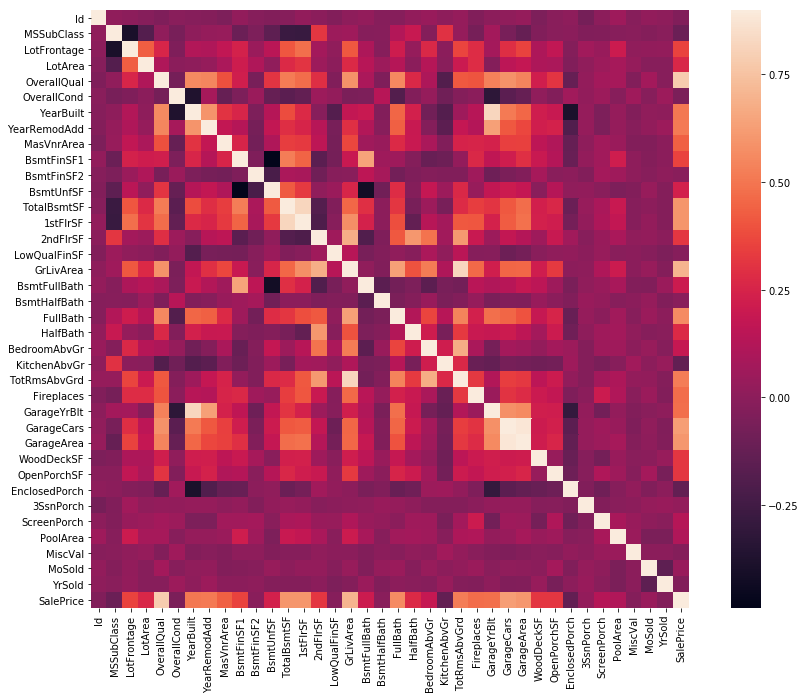

In [4]:
#Ploting heatmap of correlation matrix of the train data-set
corr_matrix = dftrain.corr()
plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

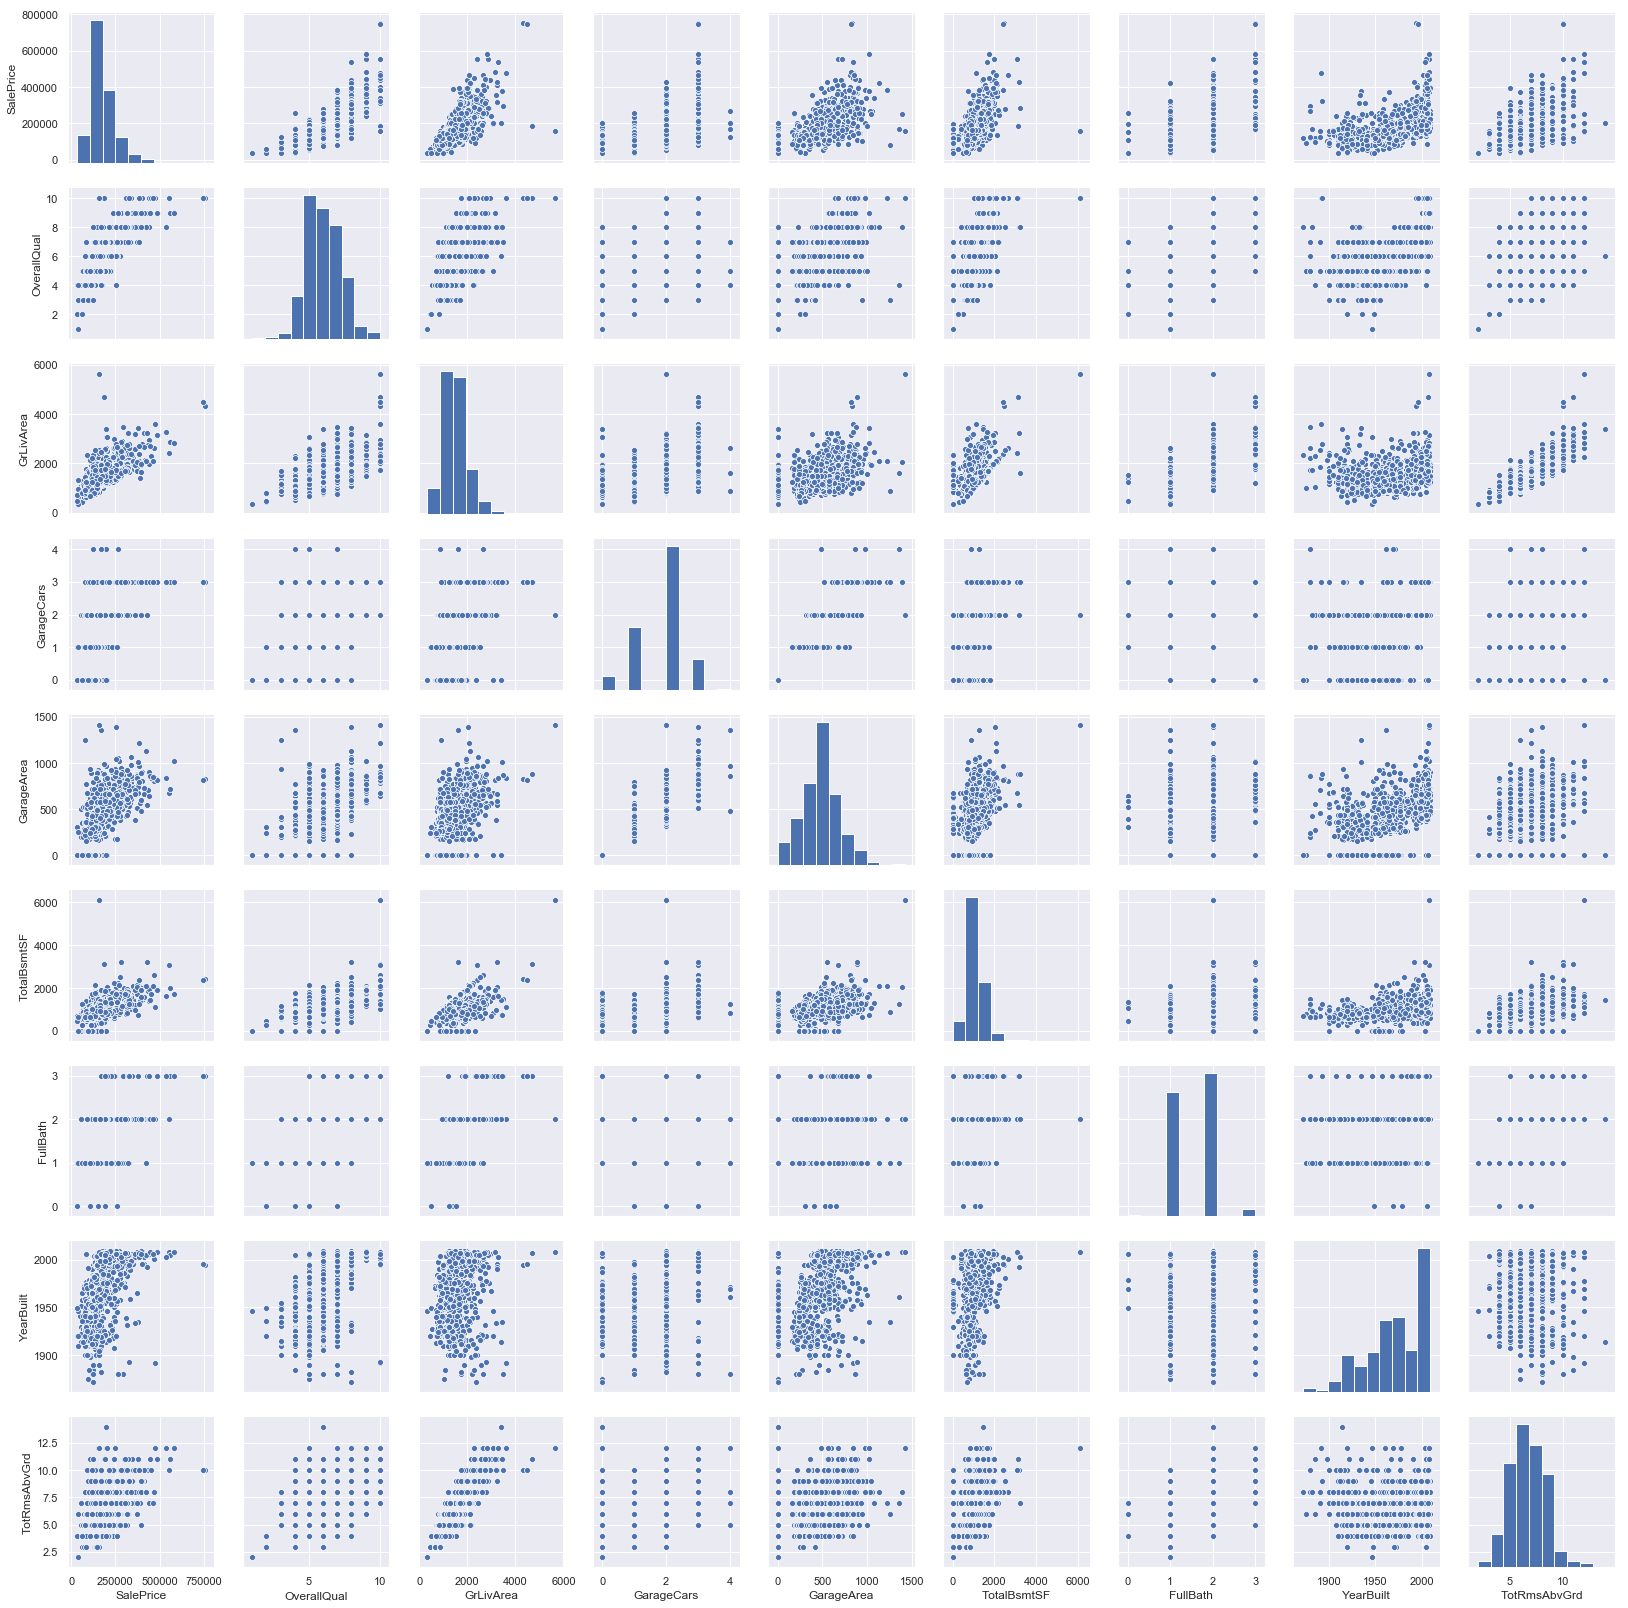

In [5]:
#Ploting scatterplot for selected columns (defined in cols)
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea' ,'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd']
sns.pairplot(dftrain[cols], height = 2.5)
plt.show();

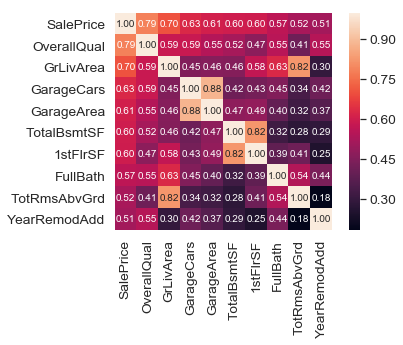

In [6]:
#Ploting heatmap of saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dftrain[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Before')

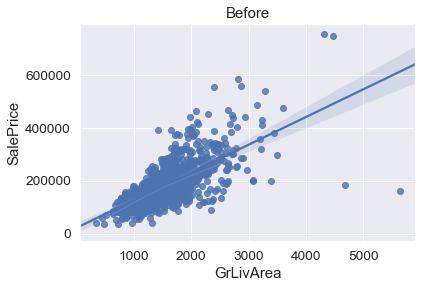

In [7]:
#Looking for outliers in 'GrLivArea' through scatter plot with linear regression line
sns.regplot('GrLivArea', 'SalePrice', data=dftrain)
plt.title('Before')

In [8]:
#Taking away the two outlires around 4,600 and 5,600 Square feet in the ‘Before’ plot
dftrain = dftrain.drop(dftrain[(dftrain['GrLivArea']>4000) & (dftrain['SalePrice']<300000)].index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'After')

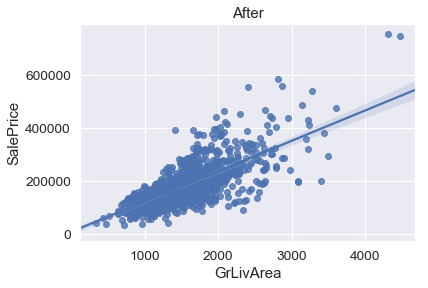

In [9]:
#Adjusted 'GrLivArea' scatter plot with linear regression line
sns.regplot('GrLivArea', 'SalePrice', data=dftrain)
plt.title('After')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Before')

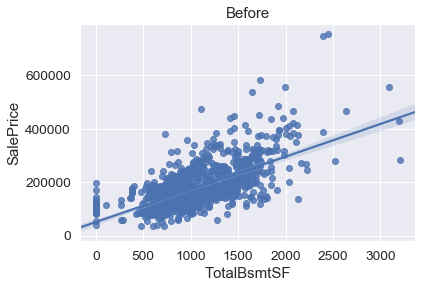

In [10]:
#Looking for outliers in 'TotalBsmtSF' through scatter plot with linear regression line
sns.regplot('TotalBsmtSF', 'SalePrice', data=dftrain)
plt.title('Before')

In [11]:
#Taking away the three outlires above 3000 Square feet in the ‘Before’ plot
dftrain = dftrain.drop(dftrain[(dftrain['TotalBsmtSF']>3000)].index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'After')

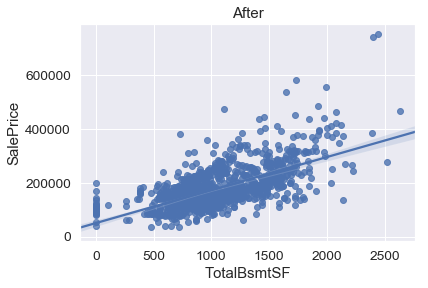

In [12]:
#Adjusted 'TotalBsmtSF' scatter plot with linear regression line
sns.regplot('TotalBsmtSF', 'SalePrice', data=dftrain)
plt.title('After')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Before')

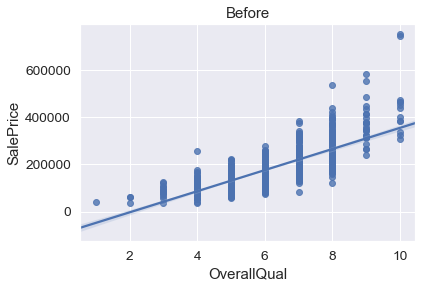

In [13]:
#Looking for outliers in 'OverallQual' through scatter plot with linear regression line
sns.regplot('OverallQual', 'SalePrice', data=dftrain)
plt.title('Before')

In [14]:
#Taking away the two outlires above 700000 USD and with a score highher than 9 in the ‘Before’ plot
dftrain = dftrain.drop(dftrain[(dftrain['SalePrice']>700000)&(dftrain['OverallQual']>9)].index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'After')

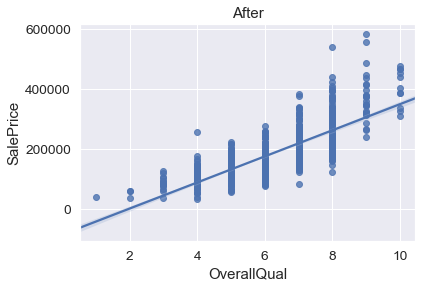

In [15]:
#Adjusted 'OverallQual' scatter plot with linear regression line
sns.regplot('OverallQual', 'SalePrice', data=dftrain)
plt.title('After')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


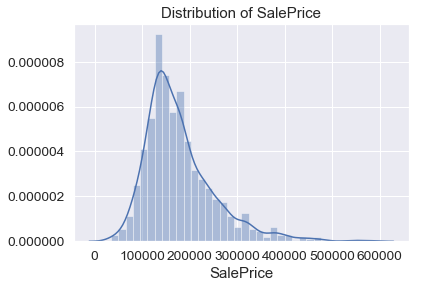

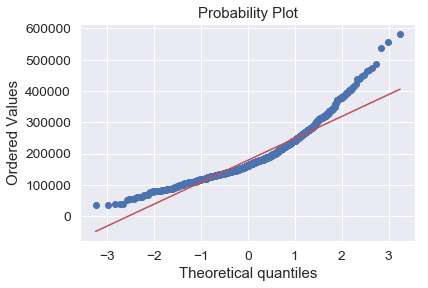

In [16]:
#Ploting histogram of the distribution
sns.distplot(dftrain['SalePrice']).set_title("Distribution of SalePrice")

#Ploting probability plot
fig = plt.figure()
res = stats.probplot(dftrain['SalePrice'], plot=plt)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mean = 12.01 and std dev = 0.39



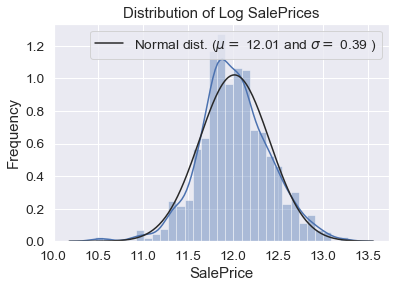

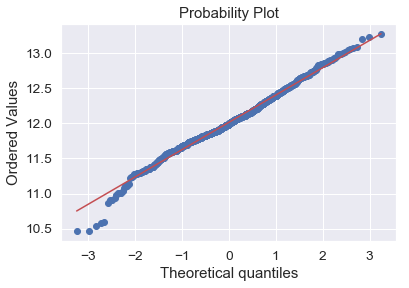

In [17]:
#Using the log1p function applies log(1+x) to all elements of the column
dftrain["SalePrice"] = np.log1p(dftrain["SalePrice"])

#Checking the new distribution after log transformation 
sns.distplot(dftrain['SalePrice'] , fit=norm);

#Fitting the parameters used by the function
(mu, sigma) = norm.fit(dftrain['SalePrice'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(dftrain['SalePrice'], plot=plt)
plt.show()

In [18]:
#Distribution of missing values in train and test data sets
NAs = pd.concat([dftrain.isnull().sum(), dftest.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
LotFrontage,205,53
Alley,1079,283
MasVnrType,8,0
MasVnrArea,8,0
BsmtQual,27,10
BsmtCond,27,10
BsmtExposure,28,10
BsmtFinType1,27,10
BsmtFinType2,27,10
Electrical,1,0


In [19]:
#Storing the unique ids of training dataset
train_ids = dftrain.index  

#Storing the unique ids of test dataset
test_ids = dftest.index

#Combining train and test datas in to one dataframe
total_df = pd.concat([dftrain,dftest]).reset_index(drop=True)

#Getting missing values in total_df
print("Shape of total_df : {}".format(total_df.shape))
total_df.isnull().sum()

Shape of total_df : (1453, 81)


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       258
LotArea             0
Street              0
Alley            1362
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [20]:
#Finding missing values as percentage of data length
total_na = (total_df.isnull().sum() / len(total_df)) * 100
total_na = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]
missing_data_perc = pd.DataFrame({'Missing Ratio' :total_na})
missing_data_perc

,Missing Ratio
PoolQC,99.655884
MiscFeature,96.283551
Alley,93.737096
Fence,80.729525
FireplaceQu,47.487956
LotFrontage,17.756366
GarageYrBlt,5.574673
GarageType,5.574673
GarageFinish,5.574673
GarageQual,5.574673


In [21]:
#Finding unique values
print ('Unique values are:', dftrain.MiscFeature.unique())
data = dftrain.select_dtypes(include=[np.number]).interpolate().dropna()

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [22]:
#Checking for 0 null values on every column 
print (sum(data.isnull().sum()))

0


In [23]:
#Examining categorical variables
categoricals = dftrain.select_dtypes(exclude=[np.number])
categoricals.describe() 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1161,1161,82,1161,1161,1161,1161,1161,1161,1161,...,1097,1097,1097,1097,1161,2,219,43,1161,1161
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,1,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,902,1156,43,741,1040,1160,844,1094,178,1006,...,683,494,1040,1056,1062,2,123,39,1004,953


In [24]:
#Getting dummies
dftrain['enc_street'] = pd.get_dummies(dftrain.Street, drop_first=True)
dftest['enc_street'] = pd.get_dummies(dftrain.Street, drop_first=True)

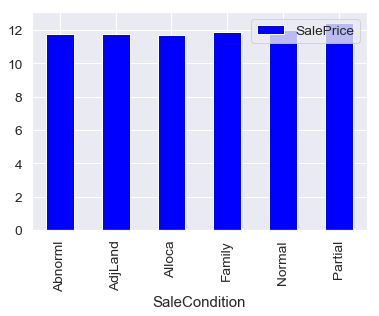

In [25]:
#Examining SaleCondition's correlation
condition_pivot=dftrain.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind = 'bar',color = 'blue')
plt.show()

In [26]:
#Encoding of the variable SaleCondition
def encode(x): return 1 if x == 'Partial' else 0
dftrain['enc_condition'] = dftrain.SaleCondition.apply(encode)
dftest['enc_condition'] = dftest.SaleCondition.apply(encode)

['Reg' 'IR1' 'IR2' 'IR3']


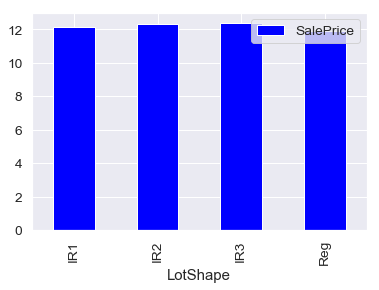

In [27]:
#Hot encoding of the variable LotShape
print (dftrain.LotShape.unique())
pt = dftrain.pivot_table(index='LotShape',values='SalePrice',aggfunc=np.median)
pt.plot(kind='bar',color='blue')
plt.show()
LotShape_D=pd.get_dummies(dftrain.LotShape)
dftrain=pd.concat([dftrain,LotShape_D],axis=1)
dftest=pd.concat([dftest,LotShape_D],axis=1)

In [28]:
#Spliting the dependent variable (Y) and the independent variable (X)
y = np.log(dftrain.SalePrice)
x = data.drop(['SalePrice','Id'], axis=1)

In [29]:
#Creating training set and hold-out set.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [30]:
#Linear regression modeling
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [31]:
#Checking the R² score for the linear regression 
print ('R² is: \n', lr_model.score(X_test,y_test))

R² is: 
 0.8616365481399115


In [32]:
#Returning a list of predicted values
predictions = lr_model.predict(X_test) # Devuelve una lista de predicciones dado un conjunto de predictores

RMSE is: 
 0.0001415057299047636


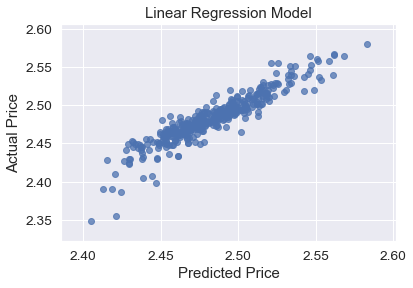

In [33]:
#RMSE, and linear regression plot of Predicted Price vs Actual Price
rmse = (mean_squared_error(y_test, predictions))
print ('RMSE is: \n', rmse)
actualPrice = y_test
plt.scatter(predictions, actualPrice, alpha=.75, color='b') 
plt.xlabel('Predicted Price') 
plt.ylabel('Actual Price')
plt.title('Linear Regression Model') 
plt.show()

In [34]:
#Transforming Real price and Predicted price back to real values
realPrice = np.expm1(np.expm1(np.array(actualPrice)))
predictedPriceLR = np.expm1(np.expm1(predictions))
print ('Real price: \n',realPrice[:5],)
print ('Original predictions: \n',predictions[:5],' \n')
print ('Predicted price: \n', predictedPriceLR[:5])

Real price: 
 [ 69528.58226084 101129.42625747  30533.36149667  32372.75870253
  57940.37986394]
Original predictions: 
 [2.49523428 2.5325895  2.42664949 2.43858362 2.47368855]  

Predicted price: 
 [ 67816.37331642 107586.05048624  30359.19545775  34779.14884469
  52371.40426809]


In [35]:
#Fitting regression model
DTR = DecisionTreeRegressor()
dtr_model = DTR.fit(X_train, y_train)

#Predicting
predictionsDTR = dtr_model.predict(X_test)
predictedPriceDTR = np.expm1(np.expm1(predictionsDTR))

In [36]:
#Checking the R² score for the decision tree regression model
print ('R² is: \n', dtr_model.score(X_test,y_test))

R² is: 
 0.6722200442115956


In [37]:
#Creating data frame to export for performance testing
FinalDF = {'realPrice':realPrice,'predictedPriceLR':predictedPriceLR,'predictedPriceDTR':predictedPriceDTR}

data_results = pd.DataFrame(FinalDF)
data_results

,realPrice,predictedPriceLR,predictedPriceDTR
0,69528.582261,67816.373316,68976.763099
1,101129.426257,107586.050486,107816.370860
2,30533.361497,30359.195458,35683.673673
3,32372.758703,34779.148845,39914.287247
4,57940.379864,52371.404268,68057.064496
5,62538.872879,57144.007231,70632.220584
6,137034.459716,112844.389466,119789.743031
7,68424.943937,60415.063851,56542.386110
8,101901.973084,93349.190103,84427.483026
9,44328.840541,41646.861135,40466.106408


In [38]:
#Exporting data_results 
data_results.to_csv('data_results.csv',index=False)